<a href="https://colab.research.google.com/github/dusarp/dance-bits-experiments/blob/main/audio_preprocessing_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the everything
!pip install numpy matplotlib librosa moviepy

In [ ]:
#imports
from moviepy.editor import VideoFileClip
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adv_positive_gHO_sFM_c01_d20_mHO1_ch09.mp4 to adv_positive_gHO_sFM_c01_d20_mHO1_ch09.mp4


In [ ]:
# Load the video file
video = VideoFileClip("/content/adv_positive_gHO_sFM_c01_d20_mHO1_ch09.mp4")

In [ ]:
#unmoount Google Drive
#drive.flush_and_unmount()

In [ ]:
#infos about the movie filem:
# Duration in seconds
duration = video.duration
print(f"Duration: {duration} seconds")

# Frames per second
fps = video.fps
print(f"FPS: {fps}")

# Resolution (width x height)
resolution = video.size
print(f"Resolution: {resolution[0]}x{resolution[1]}")

# Audio (Check if audio is present)
if video.audio:
    audio_fps = video.audio.fps
    audio_duration = video.audio.duration
    print(f"Audio FPS: {audio_fps}")
    print(f"Audio Duration: {audio_duration} seconds")
else:
    print("No audio track available")

Duration: 30.24 seconds
FPS: 59.94
Resolution: 1920x1080
Audio FPS: 44100
Audio Duration: 30.24 seconds


In [ ]:
# Calculate the total number of frames
total_frames = int(duration * fps)
print(f"Total Frames: {total_frames}")

Total Frames: 1812


In [ ]:
#generate the wav from the video file
audio_path = "/content/extracted_audio.wav"
video.audio.write_audiofile(audio_path)

MoviePy - Writing audio in /content/extracted_audio.wav


MoviePy - Done.


In [ ]:
# Load the extracted audio file
y, sr = librosa.load(audio_path)

In [ ]:
print(y.shape)

(666792,)


In [ ]:
print(sr)

22050


In [ ]:
# Generate the spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

In [ ]:
#some checks on the Mel-spectrogram
print(S_dB)

[[-25.725056 -31.675749 -35.878166 ... -56.493103 -48.869003 -45.577084]
 [-18.474442 -18.621181 -17.394413 ... -52.58429  -44.500404 -44.338146]
 [-18.1954   -14.199653 -12.703667 ... -47.3245   -44.716934 -45.807625]
 ...
 [-46.8442   -44.515457 -42.89934  ... -64.92689  -65.661606 -69.77234 ]
 [-44.925705 -41.60184  -42.851753 ... -67.427505 -68.44665  -71.047585]
 [-53.626553 -50.754868 -53.202682 ... -79.189995 -79.885704 -80.      ]]


In [ ]:
S_dB.min()

-80.0

In [ ]:
S_dB.max()

-1.9073486e-06

In [ ]:
print(type(S_dB))

<class 'numpy.ndarray'>


In [ ]:
print(S.shape)

(128, 1303)


In [ ]:
print(S_dB.shape)

(128, 1303)


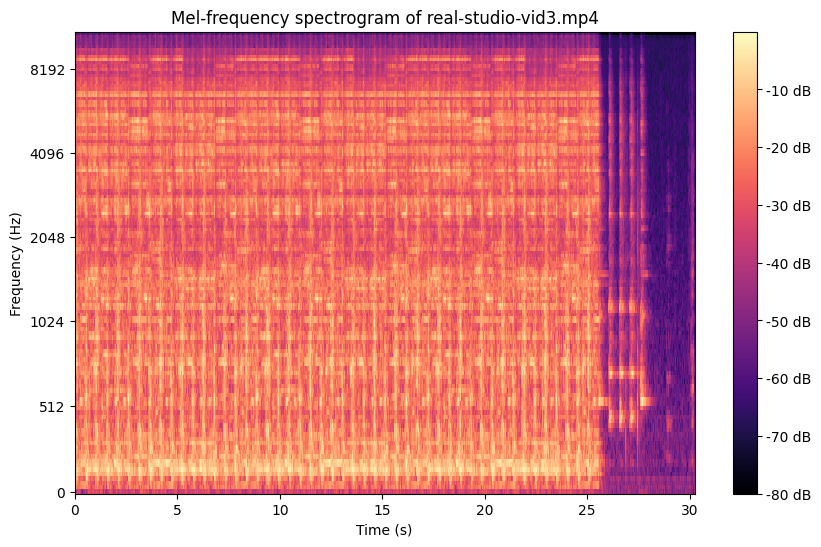

In [ ]:
# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram of real-studio-vid3.mp4')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Considerations:
*   Image files are good for visualization and compatibility with image-based models
*   NumPy arrays offer full precision and are suitable for further processing in Python.
*   HDF5 format is ideal for large datasets and efficient storage/retrieval








In [ ]:
#Save as a Numpy array .npy file
outputh_path = 'adv_positive_gHO_sFM_c01_d20_mHO1_ch09.npy'
np.save(outputh_path, S_dB)

In [ ]:
# To load later
#loaded_mel_spec = np.load('adv_negative_gJS_sFM_c01_d03_mJS2_ch03.npy')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving real-studio-vid1.npy to real-studio-vid1.npy


In [ ]:
#if we decide for HDF5, the example code is:
import h5py
import librosa

def save_mel_spectrogram_h5(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    with h5py.File(output_path, 'w') as hf:
        hf.create_dataset('mel_spectrogram', data=mel_spec_db)

# Usage
save_mel_spectrogram_h5('audio.wav', 'mel_spectrograms.h5')

# To load later
with h5py.File('mel_spectrograms.h5', 'r') as hf:
    loaded_mel_spec = hf['mel_spectrogram'][:]

Normalizing the spectrograms to be in -0.5 and +0.5 range

In [ ]:
# Step 1: Normalize the spectrogram to the range [0, 1]
mel_spec_min = mel_spec_db.min()
mel_spec_max = mel_spec_db.max()
mel_spec_normalized = (mel_spec_db - mel_spec_min) / (mel_spec_max - mel_spec_min)

# Step 2: Scale the normalized values to the range [-0.5, 0.5]
mel_spec_scaled = mel_spec_normalized - 0.5